

jupyter labextension install @jupyterlab/toc

# Study of Computer Game Sales at the Online Store 'Streamchik'.

## Project Plan 

**Project Plan: Analysis of Computer Game Sales at the Online Store 'Streamchik'**

**Objective:**  
The main goal is to identify patterns that determine the success of a game platform. This will allow us to focus on potentially popular products and plan advertising campaigns accordingly.

To achieve this, we need to analyze global sales across three main regions and other countries on major platforms over a specific period. The project will include data preparation and hypothesis testing to draw significant conclusions.

**Work Plan:**

1. **Data Loading:**  
   - Import datasets for analysis.

2. **Data Preparation:**  
   - Clean the data to handle missing values and remove duplicates.
   - Convert data types as needed.
   - Create additional columns in the dataset.

3. **Data Analysis:**  
   - Perform exploratory data analysis to understand distributions and relationships within the data.
   - Identify the relevant period for analysis and important patterns.
   - Develop user profiles based on region.

4. **Hypothesis Testing:**  
   - Formulate and test hypotheses to validate assumptions and draw conclusions.

7. **Conclusion:**  
   - Summarize key findings.
   - Provide business recommendations.
   - Offer methodological recommendations.

**Datasets:**

**games.csv:**  
   - Contains data on platforms, release years, ratings, and sales.

## Load data

Import libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from scipy.stats import binom, norm
from math import factorial, sqrt

Load data from games.csv

In [78]:
games_df = pd.read_csv('games.csv') 
display(games_df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [79]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can observe that the table contains **16,715** records:
- There are columns with missing data, the most significant being: Year_of_Release, Critic_Score, User_Score, and Rating.
- Column names can be converted to lowercase.
- Data types are correct, except for the columns Year_of_Release, User_Score, and Rating.

##  Data Preparation

### Replace column name 

Rename the column headers to lowercase

In [80]:
games_df.columns = games_df.columns.str.lower()
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Data Dupliactes

Check the dupliactes

In [81]:
print(games_df.duplicated().sum())

0


Now we check for implicit duplicates in the combination of columns: name, platform, and year of release

In [82]:
duplicates = games_df[games_df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
display(duplicates)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Two duplicate rows were found, which we remove 

In [83]:
games_df = games_df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

Check after removal

In [84]:
duplicates = games_df[games_df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]
display(duplicates)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Missing values handling

Check the columns for missing values 

In [85]:
print(games_df.isnull().sum())


name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64


Year_of_release contains 269 missing values. We will delete these rows, as there are not so many vlaues. 

In [86]:
games_df = games_df.dropna(subset=['year_of_release'])
print(games_df.isnull().sum())

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         6606
rating             6677
dtype: int64


A significant amount of data is missing in the following columns:
critic_score       8578
user_score         6701
rating             6766

- If we delete the rows, a lot of data will be lost.
- If we replace them with the mean, it will likely result in invalid data.

Solution:
- Leave the rows with missing data as they are, without any changes.

In [87]:
games_df['rating'] = games_df['rating'].fillna('unknown')

print(games_df.isnull().sum())

name                  1
platform              0
year_of_release       0
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8462
user_score         6606
rating                0
dtype: int64


Also, the columns **name** and **genre** can be left as they are since the missing values in these columns are insignificant.

### Data type conversion

The data in the **user_score** column needs to be converted to float type. However, there are 2424 values of 'tbd' (to be determined) in this column, indicating that the data is currently unknown and may be updated later. We replaced these values with NaN using numpy to facilitate the conversion of the column to float type.

In [88]:
tbd = (games_df['user_score'] == 'tbd').sum()
print(tbd)

2376


In [89]:
games_df['user_score'] = games_df['user_score'].replace ('tbd', np.nan)


tbd = (games_df['user_score'] == 'tbd').sum()
print(tbd)


0


In [90]:
games_df['user_score'] = games_df['user_score'].astype(float)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Next, we convert 'year_of_release' to integer to remove decimal values.

In [91]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

**Causes of Missing Values**

- **name:** 2 missing values - Possibly due to data entry errors or incomplete records.
- **platform:** 0 missing values - All entries have platform information.
- **year_of_release:** 269 missing values - Information about the release year is unavailable.
- **genre:** 2 missing values - Similar to 'name', likely due to data entry errors.
- **na_sales, eu_sales, jp_sales, other_sales:** 0 missing values - Sales data is complete.
- **critic_score:** 8578 missing values - Critics' scores were not provided, possibly because they were optional or not available.
- **user_score:** 6701 missing values - User scores were not filled in, and some entries are marked as 'tbd' (to be determined), indicating pending updates.
- **rating:** 6766 missing values - Ratings were either unavailable or could not be retrieved from ESRB due to technical reasons.

These reasons explain why certain columns have missing data in the dataset.

### Total sales in all regions

We create a new column where we sum up the data from all sales regions.

In [92]:
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


**Conclusions from Data Processing**:
- At this stage, we converted all column names to lowercase.
- We created a new column for further analysis.
- We checked for and removed duplicate values.
- We checked for missing values in the datasets.
- Due to a significant number of missing values in the rating columns, we replaced them with '-1'.

Now the data is ready for the next stage - data analysis.

## Exploratory Data Analysis (EDA)

### The number of games released in different years.

In [93]:
games_grouped = games_df['year_of_release'].value_counts().sort_index()
print(games_grouped)


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: int64


Now we visualize the trend of game releases over the years.

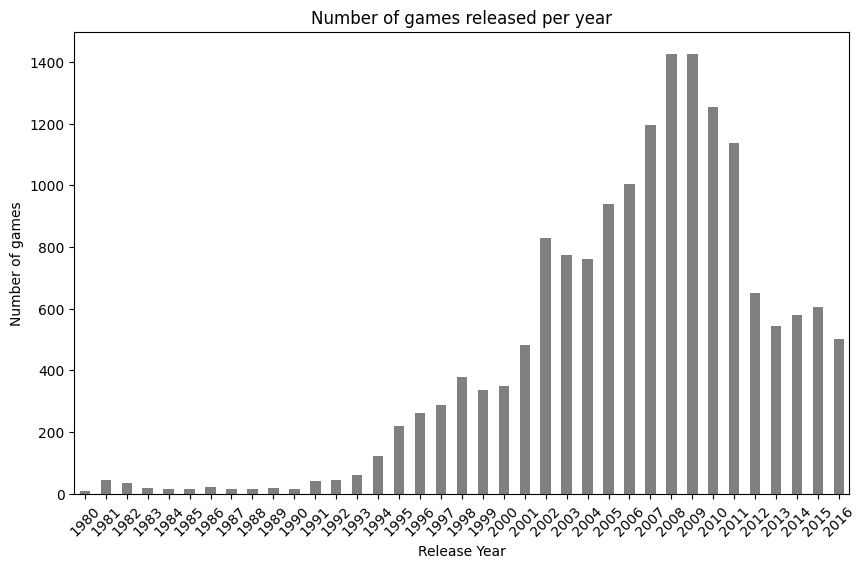

In [94]:
plt.figure(figsize=(10, 6))

games_grouped.plot(kind='bar', color='grey')


plt.title('Number of games released per year')
plt.xlabel('Release Year')
plt.ylabel('Number of games')
plt.xticks(rotation=45)
plt.show()

- A large number of games began to be released between 2002 and 2012.
- Very few games were released before 1994.
- Additionally, the graph shows a decline in releases in 2012, which continues to trend to this day.
- We can consider focusing our analysis on data from 2000 onwards, as there were relatively few games released before that time.

 ### Sales by platforms

Let's find out the total sales for each platform.

In [95]:
platform_grouped = games_df.groupby(['platform'])['total_sales'].sum().reset_index()
print (platform_grouped.sort_values(by= 'total_sales', ascending = False ))

   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.33
26      Wii       891.18
4        DS       802.78
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       289.53
2       3DS       257.81
13       PC       255.76
5        GB       254.43
29       XB       251.57
11      NES       251.05
10      N64       218.01
23     SNES       200.04
7        GC       196.73
30     XOne       159.32
0      2600        86.48
27     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
8       GEN        30.74
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


Let's sort the 5 best-selling platforms.

In [96]:
platforms_best = platform_grouped.nlargest(10, 'total_sales')['platform']
print(platforms_best)

16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
18     PS4
6      GBA
19     PSP
2      3DS
Name: platform, dtype: object


Now filter the original data for the top-selling platforms and for the period after 1994.

In [97]:
filtered_df = games_df[games_df['platform'].isin(platforms_best)]
filtered_df = filtered_df.query('2000 <= year_of_release <= 2016')
display(filtered_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01


Now we create a pivot table and a distribution plot.

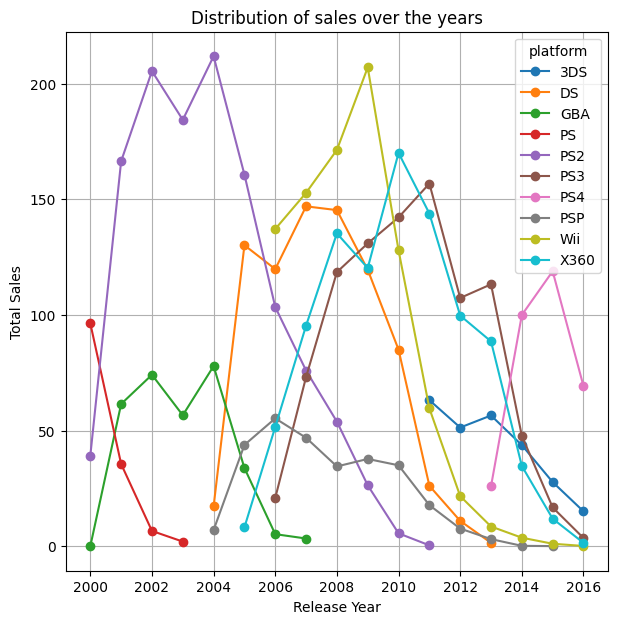

In [98]:
pivot_table = filtered_df.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')

pivot_table.plot(kind='line',  figsize = (7,7)  ,marker='o')

plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Distribution of sales over the years')
plt.grid()

plt.show() 

**Conclusion from the graph:**
- Many platforms emerged around the years 2004-2007.
- Old platforms tend to disappear between 2014 and 2016.
- The approximate lifespan of a platform is around 10-11 years.

### Platform Analysis

For the relevant period, we can consider the years 2012 to 2016. From 2012 onwards, old platforms have been declining, and new ones like the PS4 emerged from 2013 onwards. This period also shows a consistent trend of decline among many popular platforms.

In [99]:
games_filt_df = games_df.query('2012 <= year_of_release <= 2016' )

In [100]:
print(games_filt_df.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False))

   platform  total_sales
4       PS4       314.14
3       PS3       288.78
9      X360       236.54
0       3DS       194.61
10     XOne       159.32
8      WiiU        82.19
2        PC        62.65
6       PSV        49.18
7       Wii        35.37
1        DS        12.55
5       PSP        11.19


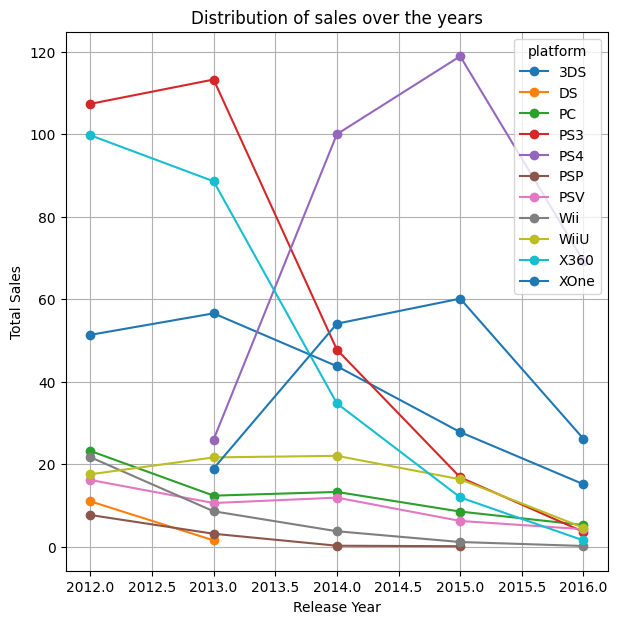

In [101]:
games_piv = games_filt_df.pivot_table(index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')

games_piv.plot(kind='line',  figsize = (7,7)  ,marker='o')

plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.title('Distribution of sales over the years')
plt.grid()

plt.show()

**Top sellers** - PS4, PS3, X360, 3DS, Xone (from 2012 to 2016)  
**Growing platforms** - PS4 and Xone  
**Declining platforms** - PS3, X360, 3DS, WiiU, X360, PS, PSV, Wii, PSP  

We can observe that there are only two growing platforms - PS4 and Xone. Some of the top-selling platforms from 2012 to 2016 either ceased to exist or declined.

 ### A "box plot" of global game sales broken down by platforms

Now we create two visualizations:
- The first plot without any limits on sales to examine outliers.
- The second plot with a restricted range of sales values to focus on the details of the box plot.

**Chart without sales restrictions to examine outliers**

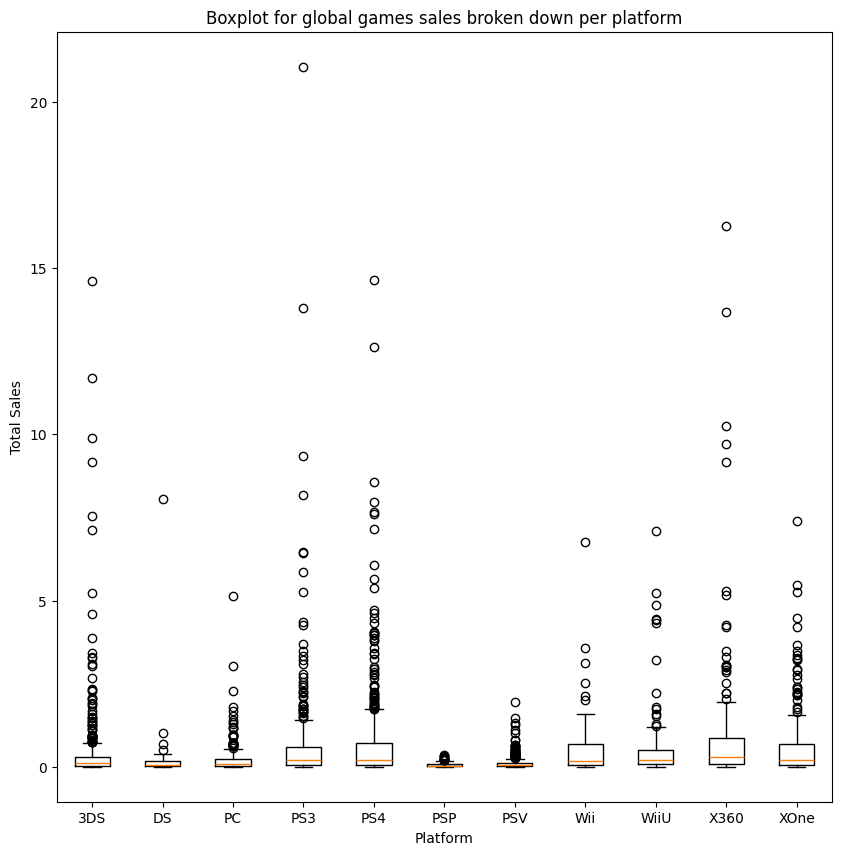

In [102]:
grouped_box = games_filt_df.groupby('platform')['total_sales'].apply(list)

plt.figure(figsize=(10, 10))
plt.boxplot(grouped_box.values, labels=grouped_box.index)

plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.title('Boxplot for global games sales broken down per platform')
plt.show()

The graph shows outliers with large sales values. To examine the box plots in more detail, limit the sales range between Q1 and Q3.

In [103]:
print(games_filt_df['total_sales'].describe())

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64


In [104]:
sales_filtered_df = games_filt_df.query('0.04 < total_sales < 0.43 ')

In [105]:
grouped_platform = sales_filtered_df.groupby('platform')['total_sales'].apply(list)

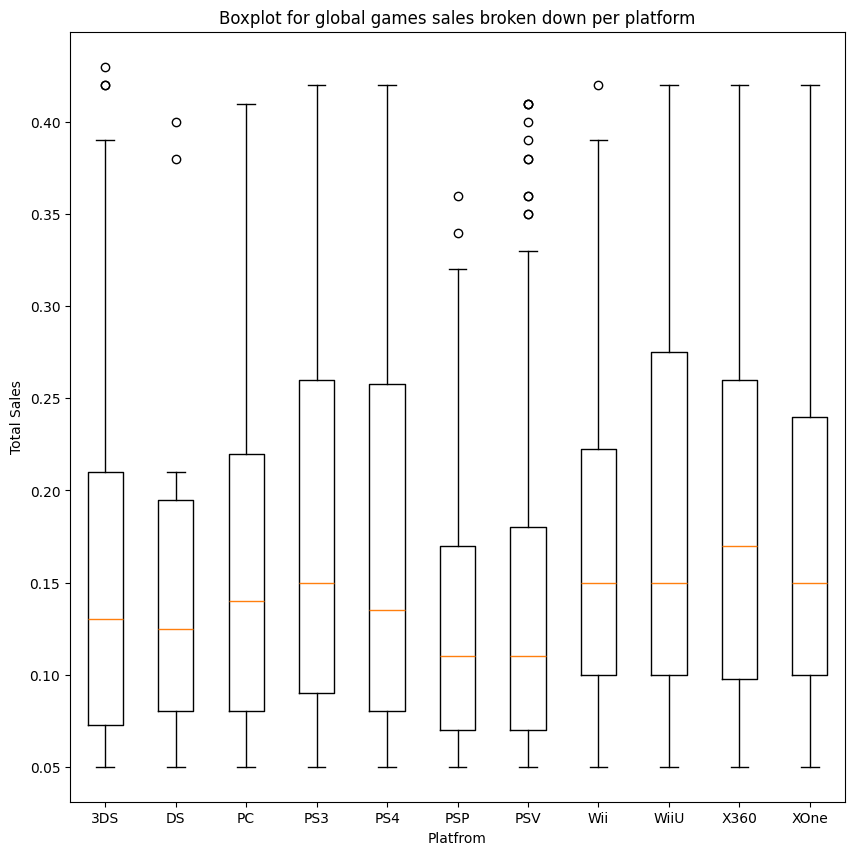

In [106]:
plt.figure(figsize=(10, 10))

plt.boxplot(grouped_platform.values, labels=grouped_platform.index)

plt.xlabel('Platfrom')
plt.ylabel('Total Sales')
plt.title('Boxplot for global games sales broken down per platform')
plt.show()

The graph shows interquartile ranges for all platforms, with sales ranging from 0.7 to 0.25 million units. The medians also vary but generally fall between 0.10 and 0.15 million units. Platforms like X360 and PS3 typically have higher average sales compared to the growing platforms PS4 and Xone.

 ### The impact of reviews on sales within a single popular platform

Let's analyze the impact of reviews on sales for the growing platform PS4 by constructing a scatter plot.

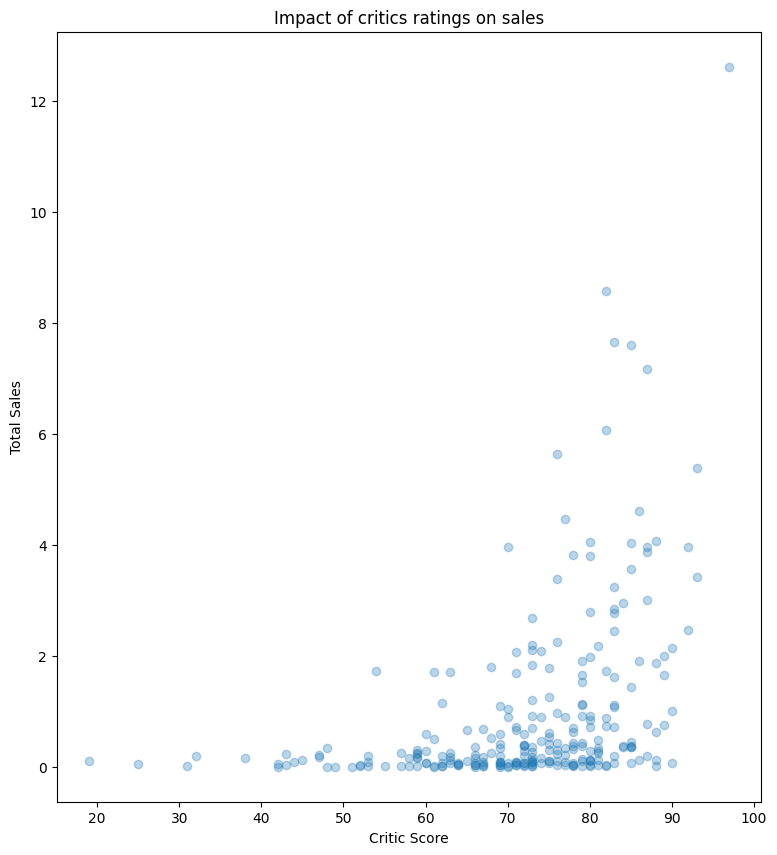

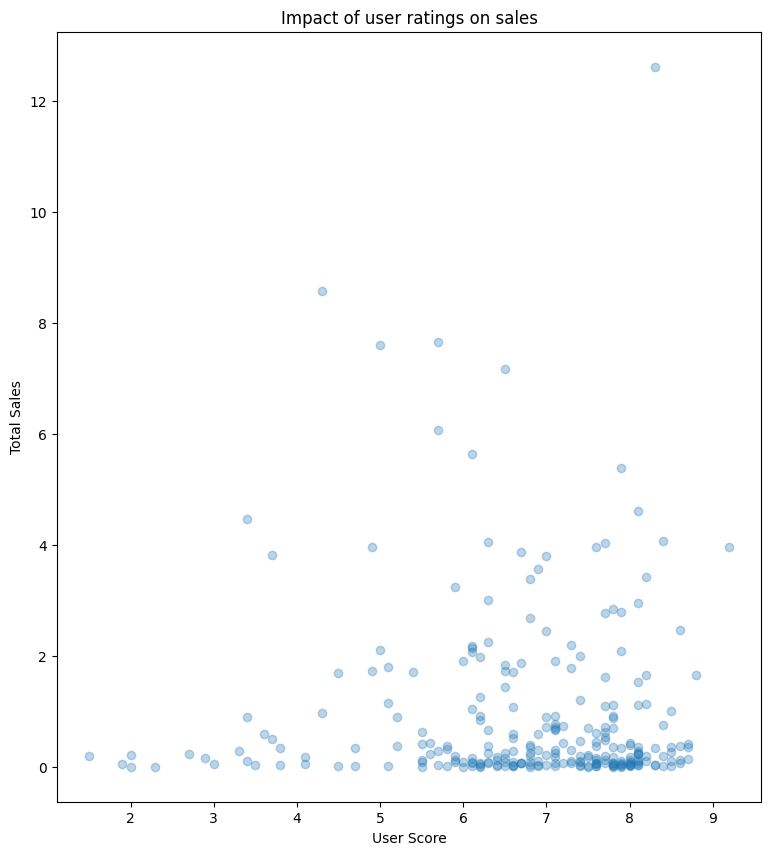

In [107]:
platform_filtered_df = games_filt_df.query('platform == "PS4"')

plt.figure(figsize=(20,10))
plt.subplot(1, 2,1)
plt.scatter(platform_filtered_df['critic_score'], platform_filtered_df['total_sales'], alpha=0.3)

plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.title('Impact of critics ratings on sales')
plt.show()
plt.figure(figsize=(20, 10))
plt.subplot(1,2,2)
plt.scatter(platform_filtered_df['user_score'], platform_filtered_df['total_sales'], alpha=0.3)

plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.title('Impact of user ratings on sales')
plt.show()

Let's calculate the Pearson correlation between reviews and sales.

In [108]:
print('The correlation between critic score and sales is equal to:', platform_filtered_df['critic_score'].corr(platform_filtered_df['total_sales']))
print('The correlation between user score and sales is equal to:', platform_filtered_df['user_score'].corr(platform_filtered_df['total_sales'])) 

The correlation between critic score and sales is equal to: 0.4065679020617815
The correlation between user score and sales is equal to: -0.031957110204556466


**Conclusion**
- From the distribution plot and the Pearson correlation coefficient, we observe a moderate positive relationship between critic scores and sales. As critic scores increase, sales tend to increase.
- There is almost no correlation between user scores and sales. This means that high or low user scores are not a significant factor in predicting sales.

### Comparison with other platforms

In [109]:
platform_filtered_df_XOne = games_filt_df.query('platform == "XOne"')
platform_filtered_df_X360 = games_filt_df.query('platform == "X360"' )
platform_filtered_df_PS3 = games_filt_df.query('platform == "PS3"')


In [110]:
print('XOne:The correlation between critic score and sales is equal to:', platform_filtered_df_XOne['critic_score'].corr(platform_filtered_df_XOne['total_sales']))
print('XOne: The correlation between user score and sales is equal to:', platform_filtered_df_XOne['user_score'].corr(platform_filtered_df_XOne['total_sales'])) 

XOne:The correlation between critic score and sales is equal to: 0.4169983280084016
XOne: The correlation between user score and sales is equal to: -0.06892505328279419


In [111]:
print('X360:The correlation between critic score and sales is equal to:', platform_filtered_df_X360['critic_score'].corr(platform_filtered_df_X360['total_sales']))
print('X360: The correlation between user score and sales is equal to:', platform_filtered_df_X360['user_score'].corr(platform_filtered_df_X360['total_sales'])) 

X360:The correlation between critic score and sales is equal to: 0.36057348885073365
X360: The correlation between user score and sales is equal to: 0.00616397864621335


In [112]:
print('PS3:The correlation between critic score and sales is equal to:', platform_filtered_df_PS3['critic_score'].corr(platform_filtered_df_PS3['total_sales']))
print('PS3: The correlation between user score and sales is equal to:', platform_filtered_df_PS3['user_score'].corr(platform_filtered_df_PS3['total_sales'])) 

PS3:The correlation between critic score and sales is equal to: 0.33415175755098553
PS3: The correlation between user score and sales is equal to: -0.006205767686051534


Visualization of the correlation between sales and user scores across three platforms

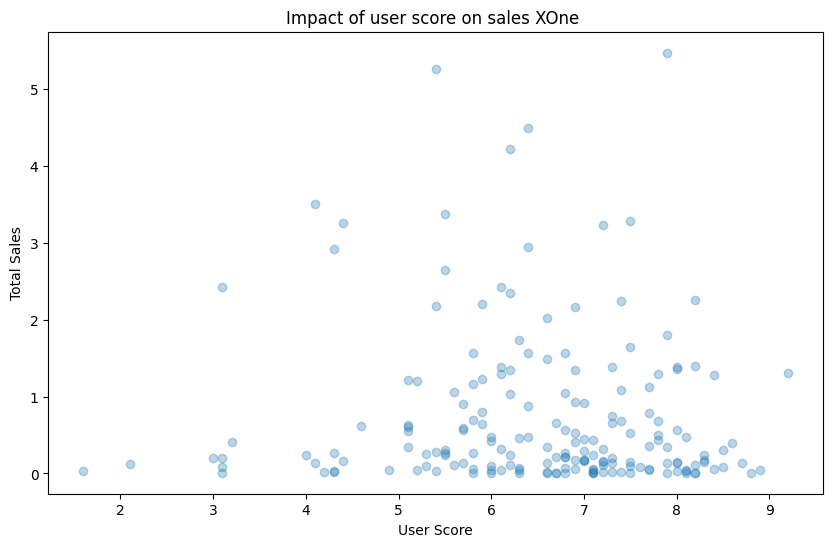

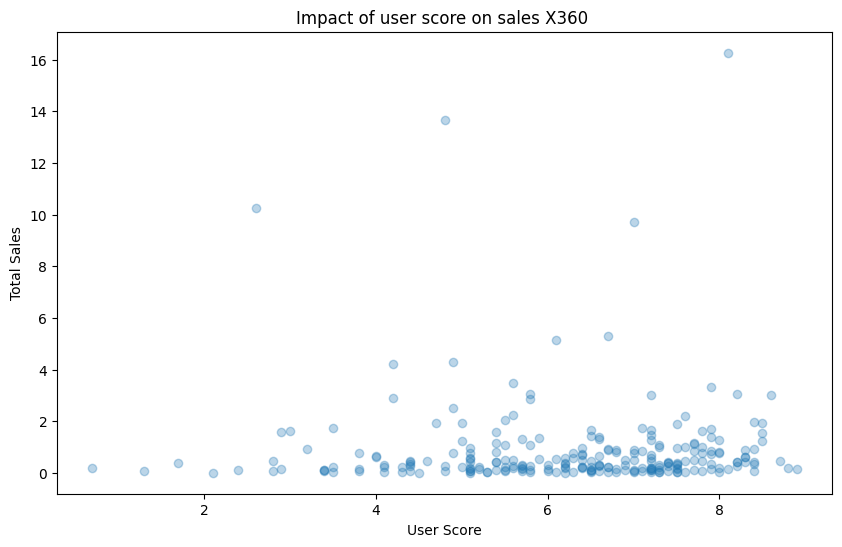

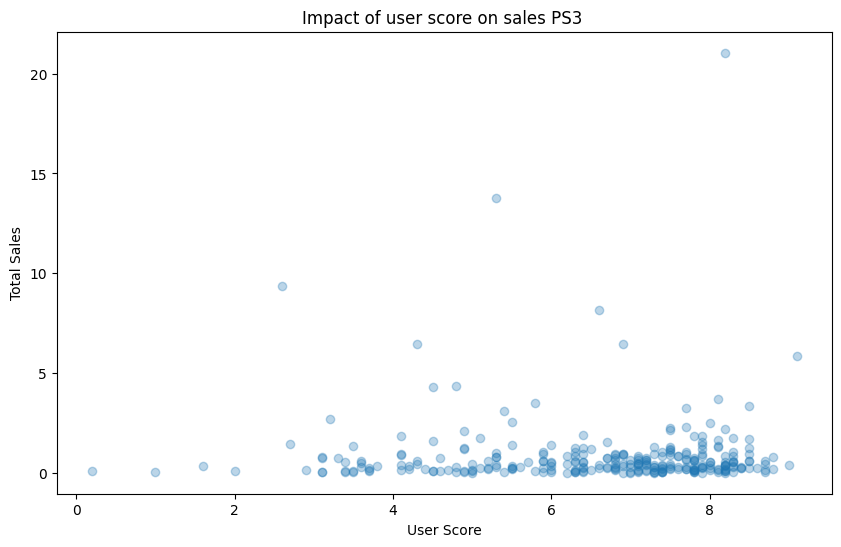

In [113]:
platforms = ['XOne', 'X360', 'PS3']
for platform in platforms:
    platform_df = games_filt_df[(games_filt_df['platform'] == platform) ]
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_df['user_score'], platform_df['total_sales'], alpha=0.3)
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')
    plt.title(f'Impact of user score on sales {platform} ')
    
    

Visualization of the correlation between sales and critic scores across three platforms

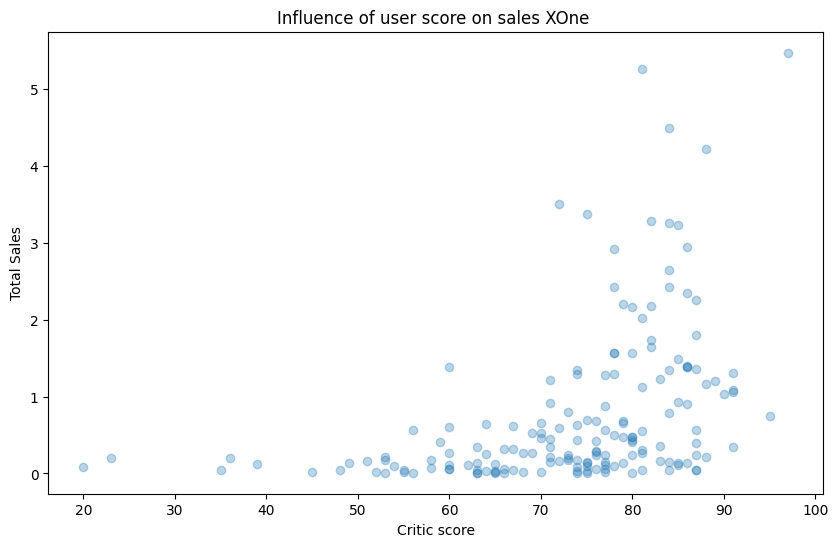

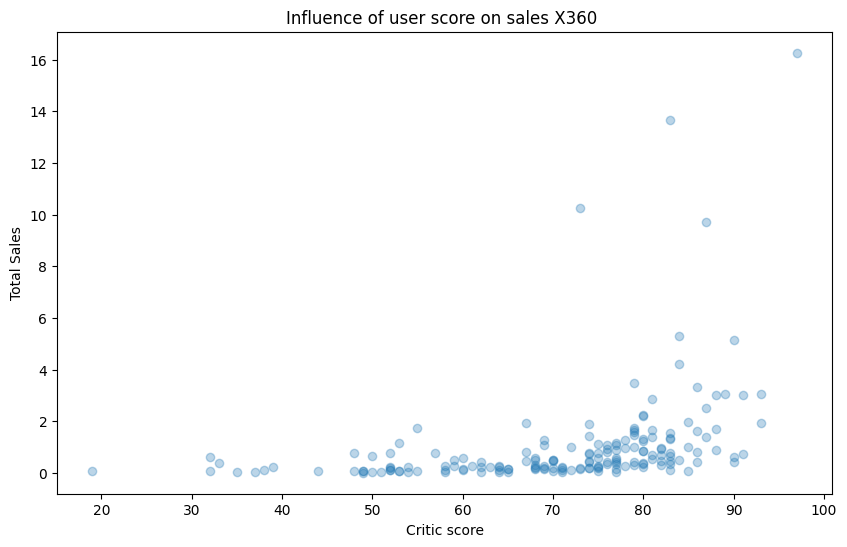

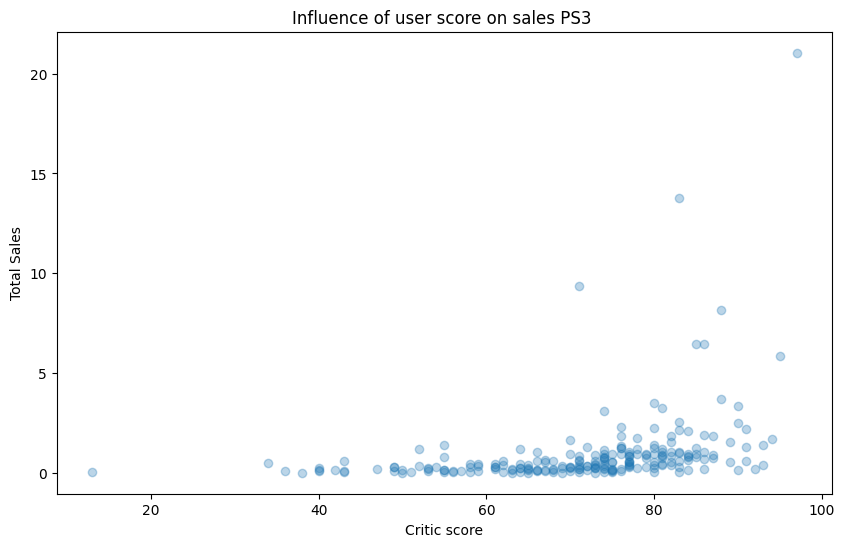

In [114]:
platforms = ['XOne', 'X360', 'PS3']
for platform in platforms:
    platform_df = games_filt_df[(games_filt_df['platform'] == platform)]
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_df['critic_score'], platform_df['total_sales'], alpha=0.3)
    plt.xlabel('Critic score')
    plt.ylabel('Total Sales')
    plt.title(f'Influence of user score on sales {platform} ')

**Conclusion**
- After checking the correlation between reviews and sales for other platforms like XOne, PS3, and X360, the following conclusions were drawn:
- There is a correlation towards moderate sales growth only with critic reviews, similar to the PS4 platform.
- User reviews do not influence sales growth, as observed with PS4.

### Distribution of games by genre

In [115]:
grouped_genre = games_filt_df.groupby('genre')['total_sales'].median().sort_values(ascending = False)
print(grouped_genre)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64


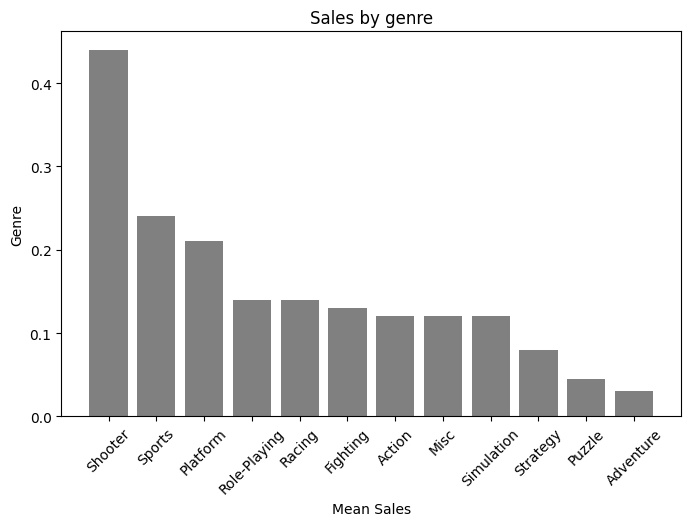

In [116]:
plt.figure(figsize=(8, 5))
plt.bar(grouped_genre.index, grouped_genre.values, color='grey')

plt.title('Sales by genre')
plt.xlabel('Mean Sales')
plt.ylabel('Genre')
plt.xticks(rotation = 45)

plt.show()

**Conclusion**
- The most profitable genres are shooter, sports, and platform.
- Less profitable genres include puzzle and adventure.
- It can be concluded that games with action-oriented gameplay like shooters and sports generate the highest sales, while more intellectually challenging games like puzzles sell less.

## The user profile in each region

The dataset contains data for three regions: EU (Europe), US (United States), and JP (Japan).

### The most popular platforms (top 5)

In [117]:

top_eu = games_filt_df.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
display('Top platforms in Europe:',top_eu)


'Top platforms in Europe:'

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
Wii      11.92
PSV      11.36
DS        3.53
PSP       0.42
Name: eu_sales, dtype: float64

In [118]:
top_na = games_filt_df.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
display('Top platforms in North America:',top_na)


'Top platforms in North America:'

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
Wii      17.45
PSV      10.98
DS        4.59
PSP       0.13
Name: na_sales, dtype: float64

In [119]:
top_jp = games_filt_df.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
display('Top platforms in Japan:',top_jp)

'Top platforms in Japan:'

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.47
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

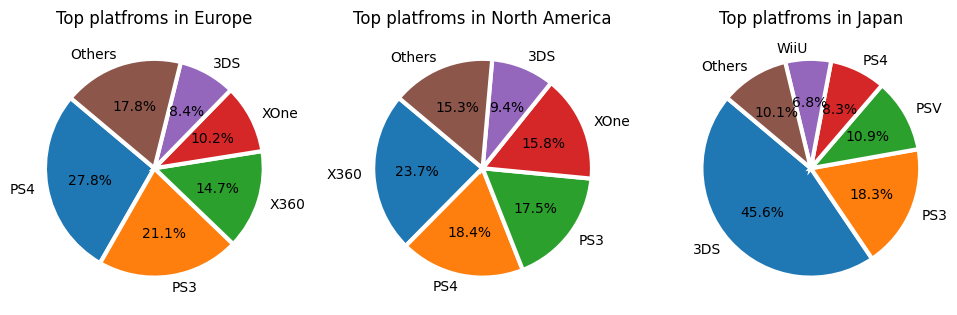

In [127]:
plt.figure(figsize = (12, 12))

plt.subplot(1, 3, 1) # 1 - кол-во строк, 2 - кол-во столбцов, 1 - индекс
top_5_eu = top_eu[:5]
other_eu = top_eu[5:].sum()
top_5_eu['Others'] = other_eu
plt.pie(top_5_eu, labels=top_5_eu.index, autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Top platfroms in Europe')

plt.subplot(1, 3, 2)
top_5_na = top_na[:5]
other_na = top_na[5:].sum()
top_5_na['Others'] = other_na
plt.pie(top_5_na, labels=top_5_na.index, autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Top platfroms in North America')

plt.subplot(1, 3, 3)
top_5_jp = top_jp[:5]
other_jp = top_jp[5:].sum()
top_5_jp['Others'] = other_jp
plt.pie(top_5_jp, labels=top_5_jp.index, autopct='%1.1f%%', startangle=140, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'})
plt.title('Top platfroms in Japan')

plt.show()


In Europe, the most frequently sold platforms are PS4 and PS3. In America, PS4 is also popular, but X360 leads. In Japan, the situation is quite different, with 3DS as the leader, although PS3 also sells well, as in America and Europe. At the same time, a significant portion of sales comprises other platforms that are not in the top 5.

### The most popular genres (top 5)

In [128]:
genre_eu = games_filt_df.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5)
display('Top genres in Europe:',genre_eu)

'Top genres in Europe:'

genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [129]:
genre_na = games_filt_df.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5)
display('Top genres in Northe America:',genre_na)

'Top genres in Northe America:'

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [130]:
genre_jp = games_filt_df.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5)
display('Top genres in Japan:',genre_jp)

'Top genres in Japan:'

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

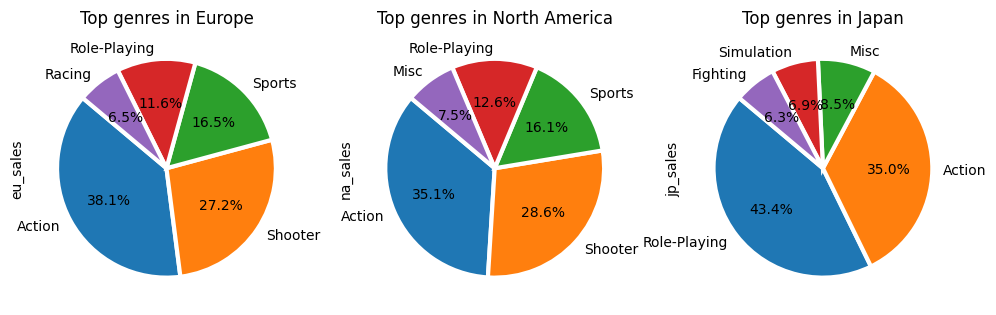

In [133]:
plt.figure(figsize = (12, 12))
plt.subplot(1, 3, 1) # 1 - кол-во строк, 2 - кол-во столбцов, 1 - индекс
genre_eu.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)
plt.title('Top genres in Europe')
plt.subplot(1, 3, 2) 
genre_na.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)
plt.title('Top genres in North America')
plt.subplot(1, 3, 3)
genre_jp.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)

plt.title('Top genres in Japan')
plt.show()

**Conclusion**
In Europe and North America, the distribution of genres is very similar, while in Japan, role-playing games (RPGs) are the most popular. Nevertheless, Action remains the top genre, occupying a significant share of sales in all regions.

### The impact of ESRB ratings on sales in regions

In [134]:
rating_eu = games_filt_df.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).head(5)
display('ERSB rating in Europe',rating_eu)

'ERSB rating in Europe'

rating
M          193.96
E          113.02
unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

In [135]:
rating_na = games_filt_df.groupby('rating')['na_sales'].sum().sort_values(ascending = False).head(5)
display('ERSB rating in North America',rating_na)

'ERSB rating in North America'

rating
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

In [136]:
rating_jp = games_filt_df.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).head(5)
display('ERSB rating in Japan',rating_jp)

'ERSB rating in Japan'

rating
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

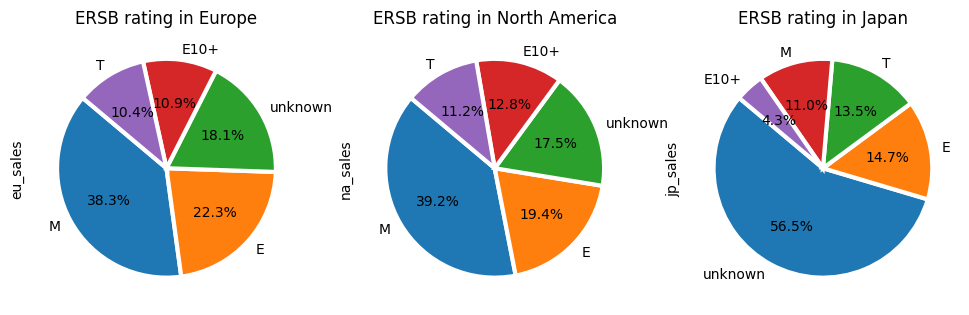

In [137]:
plt.figure(figsize = (12, 12))
plt.subplot(1, 3, 1) 
rating_eu.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)
plt.title('ERSB rating in Europe')
plt.subplot(1, 3, 2) 
rating_na.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)
plt.title('ERSB rating in North America')
plt.subplot(1, 3, 3)
rating_jp.plot(kind='pie', autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white'}, startangle=140)
plt.title('ERSB rating in Japan')
plt.show()

In Europe and North America, the highest sales are observed in the categories M (Mature) and E (Everyone). In Japan, however, there is a significant amount of data marked as "unknown" - nearly half of the data. The leading categories for sales are E (Everyone) and T (Teen, ages 13 and up). 

It's noteworthy that T (Teen) games sell the least in the Western part of the world. In Japan, many games do not have ESRB ratings, possibly because Japan has its own age rating system called CERO. It can be inferred that CERO ratings are more important in Japan, hence the absence of ESRB ratings for many games in that region.

## Hypothesis testing

### The average user ratings for Xbox One and PC platforms are the same.

Here's the translation of your hypothesis and approach to conducting the t-test for independent samples:

You have two samples:
- Ratings for the XOne platform
- Ratings for the PC platform

Since the samples are independent of each other, you will conduct an independent t-test using `scipy.stats.ttest_ind`.

- **Null Hypothesis (H0)**: The average user ratings for XOne and PC platforms are the same.
- **Alternative Hypothesis (H1)**: The average user ratings for XOne platform may be less than or greater than the average ratings for PC platform (two-tailed hypothesis).

Prepare the samples for the platforms

In [138]:
xbox_df = games_filt_df.query('platform == "XOne"').dropna(subset=['user_score'])
pc_df = games_filt_df.query('platform == "PC" ').dropna(subset=['user_score'])

Let's test the hypothesis with a significance level (alpha) of 10% (since it's a two-tailed test).

In [139]:
alpha = 0.1

results = st.ttest_ind(xbox_df['user_score'], pc_df['user_score'], alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
        print('We do not have sufficient evidence to reject the null hypothesis')

p-value: 0.5535080500643661
We do not have sufficient evidence to reject the null hypothesis


**Conclusion**

We failed to reject the null hypothesis, therefore, with a higher degree of probability, the average user ratings for the XOne and PC platforms do not exhibit statistically significant differences.

### The average user ratings for the Action and Sports genres are different.



There are two samples:
- Ratings for the action genre
- Ratings for the sports genre

The samples are independent of each other, thus a t-test for independent samples will be conducted using **scipy.stats.ttest_ind**.

- **H0 (null hypothesis)**: The average user ratings for the action and sports genres are the same.
- **H1 (two-tailed hypothesis)**: The average user ratings for the action and sports genres are different.

Prepare the samples for the genres

In [143]:
action_df = games_filt_df.query('genre == "Action"').dropna(subset=['user_score'])
sports_df = games_filt_df.query('genre == "Sports"').dropna(subset=['user_score'])

Let's check the hypothesis with a significance level (alpha) of 10% (since it's a two-tailed test).

In [144]:
alpha = 0.1

results = st.ttest_ind(action_df['user_score'], sports_df['user_score'], alternative='two-sided')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
        print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.804523380462917e-26
Отвергаем нулевую гипотезу


**Conclusion**

We reject the null hypothesis, indicating with greater confidence that the average user ratings for the genres action and sports are different.

## Conclusion


In this study, we analyzed data from the "Streamchik" internet store on global computer game sales. The data was prepared for analysis by converting data types, checking for missing values, removing duplicates, and introducing additional columns for further analysis.

**Key findings from the data analysis:**

1. **Analysis Period:**
   - The analysis of game sales growth and decline showed that many games were released between 2002 and 2012, with a sharp decline starting from 2012, a trend that continues to the present day (2016). Considering this, we decided to focus on data from 2012 to 2016 to track only the most relevant trends.

2. **Leading Platforms:**
   - Analysis of data from 2012 to 2016 gave us the following sales leaders: PS4, PS3, X360, 3DS, and Xone. Platforms like PS4 and Xone show stable and strong growth.

3. **Impact of User and Critic Ratings on Sales:**
   - Analysis of popular platforms showed that sales moderately increase with higher critic ratings. However, user ratings practically do not affect sales growth.

4. **Genre Distribution:**
   - Based on this criterion, it can be concluded that shooters and sports games generate the highest sales, while more intellectual games like adventures and puzzles sell less.

**Further Analysis: User Profiles in Each Region**

We analyzed users from three regions: Europe, North America, and Japan based on three criteria: popular platforms, genres, and ESRB ratings.

**Conclusions:**

- Users in Europe and North America show very similar preferences in platforms, with PS3 selling well in both regions. X360 is a leader in North America.
- In terms of genres, Europe and North America also have similar distributions, while role-playing games dominate in Japan. However, Action remains the overall leader, occupying a significant share of sales in all regions.
- In Europe and North America, the highest sales are in the M (Mature) and E (Everyone) categories. In Japan, sales are highest in the E (Everyone) and T (Teen 13+) categories. Teen 13+ games sell the worst in the Western world.

**Hypothesis Testing:**

In the project, we formulated several hypotheses and tested them:
- The average user ratings for XOne and PC platforms are not significantly different.
- The average user ratings for Action and Sports genres are different.

**Recommendations:**

Based on the conclusions above, we can provide the following recommendations for identifying potentially popular products:
- Focus on PlayStation platforms (PS4 and PS3) and Xbox One, as they show growth compared to other platforms. PS3 historically sold well in all regions but declined after 2013.
- Pay more attention to critic ratings as they influence sales growth. Therefore, encouraging critics to provide ratings more frequently could be beneficial.
- Critic ratings could also be used in advertising campaigns to attract potential users.
- Invest more in genres such as shooters and sports games (with a focus on role-playing games in Japan).
- Release more games in the Mature and Everyone categories. In Japan, consider focusing on the Teen 13+ category as it shows good sales.

**Methodological Recommendations:**

- Since a correlation was found between user and critic ratings and sales, and there were many missing values in these columns, it would be beneficial to recover this data technically or survey users to identify significant factors influencing sales.
- The age rating system in Japan differs from the West, resulting in a high number of missing values. In the future, it may be useful to unify these two standards to align them for analysis purposes.

